In [1]:
import os
import glob
from osgeo import gdal
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import MeanIoU
from matplotlib import pyplot as plt
import pickle




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading Images
image_names = glob.glob(r'/content/drive/MyDrive/Tushar/FBD/image_patches/*.tif')
print(image_names)

['/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_0.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_4.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_1.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_3.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_5.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_2.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_7.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_1_3.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_8.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_1_0.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_10.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_1_1.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_6.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_1_2.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_9.tif', '/conten

In [4]:
image_names.sort()
print(image_names)

['/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_0.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_1.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_10.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_2.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_3.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_4.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_5.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_6.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_7.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_8.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_0_9.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_10_0.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_10_1.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_10_10.tif', '/content/drive/MyDrive/Tushar/FBD/image_patches/jag_t2_10_2.tif', '/c

In [6]:
print(len(image_names))

176


In [7]:
images_names_ = [gdal.Open(img).ReadAsArray() for img in image_names]

In [8]:
image_dataset = np.array(images_names_)

In [9]:
# image_dataset_ = np.asarray(image_dataset, dtype=int)
image_dataset_ = np.asarray(image_dataset, dtype='uint8')

In [10]:
image_dataset_

array([[[[153, 154, 152, ..., 138, 140, 155],
         [143, 143, 145, ..., 132, 141, 154],
         [145, 137, 137, ..., 146, 147, 140],
         ...,
         [133, 112,  93, ...,  64,  77,  65],
         [ 95, 109, 114, ...,  51,  58,  62],
         [ 51,  85, 136, ...,  57,  49,  61]],

        [[141, 141, 140, ..., 109, 111, 126],
         [126, 125, 128, ..., 106, 114, 125],
         [124, 116, 115, ..., 122, 121, 112],
         ...,
         [100,  80,  63, ..., 100, 113, 100],
         [ 60,  76,  82, ...,  83,  89,  93],
         [ 15,  52, 105, ...,  85,  76,  86]],

        [[143, 143, 142, ..., 106, 109, 123],
         [129, 129, 131, ..., 101, 110, 122],
         [129, 121, 121, ..., 117, 117, 109],
         ...,
         [ 93,  74,  59, ...,  72,  86,  75],
         [ 54,  70,  79, ...,  59,  65,  68],
         [  9,  46, 102, ...,  62,  53,  64]]],


       [[[125,  94,  84, ...,  59,  66,  66],
         [141, 115,  99, ...,  60,  63,  61],
         [145, 117,  97, ..., 

In [11]:

image_dataset_.dtype

dtype('uint8')

In [12]:
image_dataset_.shape

(176, 3, 256, 256)

In [13]:
#Reading Masks

mask_names = glob.glob('/content/drive/MyDrive/Tushar/FBD/mask_patches/*.tif')
print(mask_names)

['/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_0.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_6.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_2.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_7.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_1.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_4.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_3.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_5.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_1_6.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_1_1.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_8.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_1_2.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_1_10.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_1_9.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_1_8.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_

In [14]:
mask_names.sort()
print(mask_names)

['/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_0.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_1.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_10.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_2.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_3.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_4.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_5.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_6.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_7.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_8.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_0_9.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_10_0.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_10_1.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_10_10.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/mask_10_2.tif', '/content/drive/MyDrive/Tushar/FBD/mask_patches/

In [15]:
print(len(mask_names))

176


In [16]:
mask_names_ = [gdal.Open(mask).ReadAsArray() for mask in mask_names]

In [17]:
mask_dataset = np.array(mask_names_)

In [18]:
# mask_dataset_ = np.asarray(mask_dataset, dtype = int)
mask_dataset_ = np.asarray(mask_dataset, dtype = 'uint8')

In [19]:
mask_dataset_

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
mask_dataset_.dtype

dtype('uint8')

In [21]:
#Labels in the mask are
np.unique(image_dataset_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
print(image_dataset_.shape)
print(mask_dataset_.shape)

(176, 3, 256, 256)
(176, 256, 256)


In [23]:

# Dimension expanding
new_image_dataset = np.expand_dims(image_dataset_, axis = 4)
new_mask_dataset = np.expand_dims(mask_dataset_, axis = 3)

In [24]:
#Check shape of images and mask
print(new_image_dataset.shape)
print(new_mask_dataset.shape)

(176, 3, 256, 256, 1)
(176, 256, 256, 1)


In [25]:
#Normalize images
new_image_dataset_ = new_image_dataset /np.max(new_image_dataset)  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
new_mask_dataset_ = new_mask_dataset /np.max(new_mask_dataset)  #Pixel values will be 0 or 1

In [26]:
#Maximum in image dataset and unique value in mask dataset after normalization
print(np.nanmax(new_image_dataset_))
print(np.nanmin(new_image_dataset_))
print(np.unique(new_mask_dataset_))

1.0
0.0
[0. 1.]


In [27]:
print(new_image_dataset_.dtype)
print(new_mask_dataset_.dtype)

float64
float64


In [30]:
non_boundary_pixels = np.count_nonzero(new_mask_dataset_ == 0)
boundary_pixels = np.count_nonzero(new_mask_dataset_ == 1)

In [31]:
print(non_boundary_pixels)
print(boundary_pixels)

11229649
304687


In [32]:
total_pixels = (boundary_pixels + non_boundary_pixels)
boundary_weight = (total_pixels / boundary_pixels) * 0.7
non_boundary_weight = (total_pixels / non_boundary_pixels) * 0.3
class_weights = [non_boundary_weight, boundary_weight]

In [33]:
def weighted_binary_crossentropy(non_boundary_weight, boundary_weight):
    def loss(y_true, y_pred):
        b_ce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        weight_vector = y_true * boundary_weight + (1. - y_true) * non_boundary_weight
        weighted_b_ce = weight_vector * b_ce
        return tf.keras.backend.mean(weighted_b_ce)
    return loss

loss_function = weighted_binary_crossentropy(non_boundary_weight, boundary_weight)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
#Training and Testing Splitting
X_train, X_test, y_train, y_test = train_test_split(new_image_dataset_, new_mask_dataset_, test_size = 0.20, random_state = 42)

In [36]:

#Checking shape of training testing images and masks
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3, 256, 256, 1)
(140, 256, 256, 1)
(36, 3, 256, 256, 1)
(36, 256, 256, 1)


In [37]:
#Checking data type of training testing images and masks
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


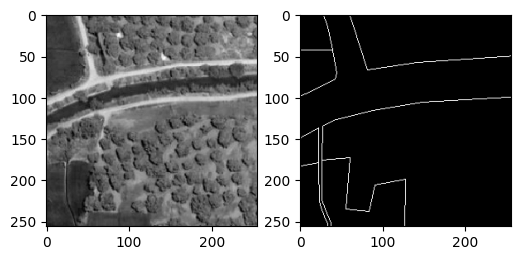

In [39]:

#Sanity check, view few images and masks
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,2,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [40]:
X_train_ = np.transpose(X_train, (0, 2, 3, 1, 4))
X_test_ = np.transpose(X_test, (0, 2, 3, 1, 4))
print(X_train_.shape)
print(X_test_.shape)

(140, 256, 256, 3, 1)
(36, 256, 256, 3, 1)


In [41]:
#Unet Implementation
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
import keras
from keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU
from keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [42]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Concatenate, Dropout, Lambda
from tensorflow.keras.models import Model
from keras.layers import Activation, MaxPool2D, Concatenate

In [74]:
# Build Residual U-Net
def conv_block(inputs, num_filters):
    x = inputs
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    residual = Conv2D(num_filters, 1, padding="same")(inputs)
    residual = BatchNormalization()(residual)
    x = concatenate([x, residual])
    return x
def residual_unet():
    inputs = Input(shape=(256, 256, 3))
    # Contraction path
    c1 = conv_block(inputs, 16)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = conv_block(p1, 32)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = conv_block(p2, 64)
    p3 = MaxPooling2D((2, 2))(c3)
    c4 = conv_block(p3, 128)
    p4 = MaxPooling2D((2, 2))(c4)
    c5 = conv_block(p4, 256)
    # Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = conv_block(u6, 128)
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = conv_block(u7, 64)
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = conv_block(u8, 32)
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = conv_block(u9, 16)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = residual_unet()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_56 (Conv2D)          (None, 256, 256, 16)         448       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_54 (Ba  (None, 256, 256, 16)         64        ['conv2d_56[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_36 (Activation)  (None, 256, 256, 16)         0         ['batch_normalization_54

In [75]:
history = model.fit(X_train_, y_train,
batch_size=32,
verbose=1,
epochs=200,
validation_data=(X_test_, y_test),
shuffle=False)

Epoch 1/200
5/5 [==============================] - 18s 605ms/step - loss: 1.0649 - accuracy: 0.1761 - val_loss: 0.7346 - val_accuracy: 0.1902
Epoch 2/200
5/5 [==============================] - 2s 417ms/step - loss: 0.8343 - accuracy: 0.2337 - val_loss: 0.8796 - val_accuracy: 0.2121
Epoch 3/200
5/5 [==============================] - 2s 418ms/step - loss: 0.7005 - accuracy: 0.5369 - val_loss: 0.9437 - val_accuracy: 0.5304
Epoch 4/200
5/5 [==============================] - 2s 415ms/step - loss: 0.5971 - accuracy: 0.8072 - val_loss: 0.6686 - val_accuracy: 0.6949
Epoch 5/200
5/5 [==============================] - 2s 418ms/step - loss: 0.5221 - accuracy: 0.9324 - val_loss: 0.9602 - val_accuracy: 0.4919
Epoch 6/200
5/5 [==============================] - 2s 420ms/step - loss: 0.4952 - accuracy: 0.9484 - val_loss: 40.2797 - val_accuracy: 0.0493
Epoch 7/200
5/5 [==============================] - 2s 419ms/step - loss: 0.4696 - accuracy: 0.9585 - val_loss: 30.7304 - val_accuracy: 0.0506
Epoch 8/20

In [76]:
#Save the model for future use
model.save(r'/content/drive/MyDrive/Tushar/FBD/RESUNet_200Epochs_FBD_without_custom_loss_function.hdf5')

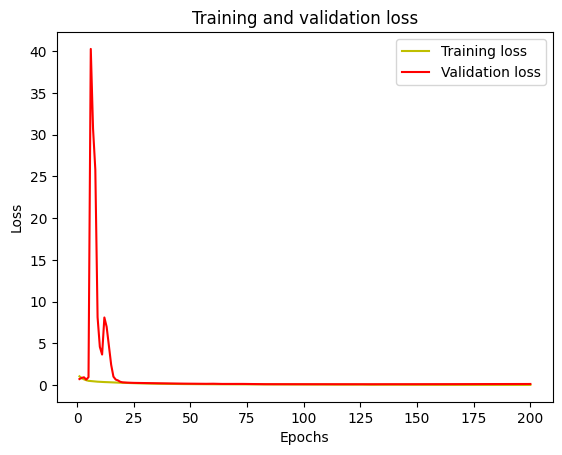

In [77]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

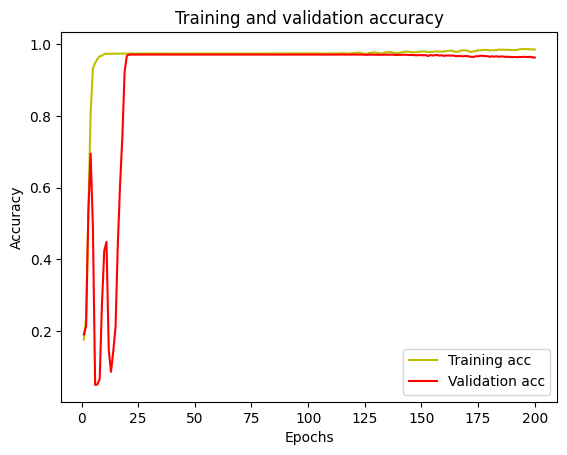

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
#Load previously saved model
from keras.models import load_model

In [80]:
#IOU
y_pred=model.predict(X_test_)
y_pred_thresholded = y_pred > 0.5

2/2 [==============================] - 1s 118ms/step


In [81]:
from tensorflow.keras.metrics import MeanIoU

In [82]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.5236274


(1, 256, 256, 3, 1)
1/1 [==============================] - 0s 20ms/step
(256, 256)


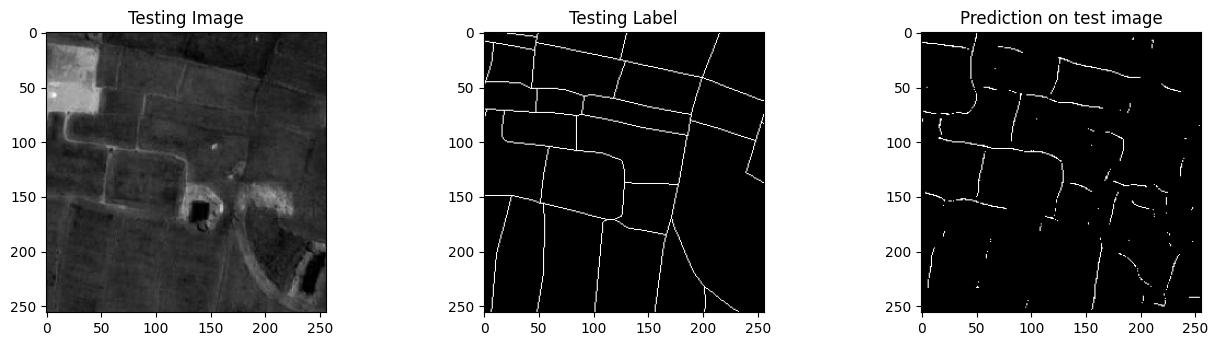

In [89]:
import random
threshold = 0.5
test_img_number = random.randint(0, len(X_test_)-1)
test_img = X_test_[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.show()